#  Использование предобученных моделей для классификации изображений

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://pytorch.org/vision/stable/models.html
* https://albumentations.ai/docs/getting_started/image_augmentation/

## Задачи для совместного разбора

1\. Загрузите предобученную модель из `torchvision`. Познакомьтесь с ее архитектурой. Заморозьте веса нескольких слоев.

In [ ]:
import torchvision
import torch

In [ ]:
model = torchvision.models.resnet50(pretrained=True)
print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 148MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Используя реализацию из `torchvision`, cоздайте модель `vgg16` и загрузите предобученные веса `IMAGENET1K_V1`. Выведите на экран структуру модели, количество слоев и количество настраиваемых (`requires_grad==True`) параметров модели.

- [ ] Проверено на семинаре

In [ ]:
import torch
import torchvision.models as models

# Создаем модель VGG16 с предобученными весами
vgg16 = models.vgg16(weights='DEFAULT')

# Выводим структуру модели
print(vgg16)

# Подсчитываем количество слоев
num_layers = sum(1 for _ in vgg16.modules())
print(f'Количество слоев: {num_layers}')

# Подсчитываем количество настраиваемых параметров
num_trainable_params = sum(p.numel() for p in vgg16.parameters() if p.requires_grad)
print(f'Количество настраиваемых параметров: {num_trainable_params}')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 89.2MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

<p class="task" id="2"></p>

2\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

К обучающему датасету примените следующее преобразование: приведите картинки к размеру 256x256, затем обрежьте по центру с размером 224х224, затем переведите изображения в тензор и нормализуйте значения интенсивности пикселей (`mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`).

К тестовому датасету примените преобразование `VGG16_Weights.IMAGENET1K_V1.transforms`.

- [ ] Проверено на семинаре

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import zipfile
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader

In [ ]:
archive = zipfile.ZipFile('/content/drive/MyDrive/cat_breeds_4.zip', 'r')
archive.extractall()

In [ ]:
data_dir = '/content/drive/MyDrive/cat_breeds_4'

# Определите преобразования для обучающего и тестового датасета
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Создайте датасет CatBreeds
dataset = datasets.ImageFolder(data_dir, transform=train_transforms)

# Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Примените преобразования к тестовому датасету
test_dataset = Subset(dataset, test_dataset.indices)
test_dataset.dataset.transform = test_transforms

# Создайте DataLoader для обучающего и тестового датасета
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

<p class="task" id="3"></p>

3\. Заморозьте все веса модели из предыдущего задания. Замените последний слой `Linear` классификатора на новый слой, соответствующий задаче. После изменения последнего слоя выведите на экран количество настраиваемых (`requires_grad==True`) параметров модели. Решите задачу, используя модель с замороженными весами и изменнным последним слоем.

Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве.

- [ ] Проверено на семинаре

In [ ]:
import torchvision
import time

Количество настраиваемых параметров: 16388
Epoch [1], Loss: 0.6573, Train Accuracy: 0.7294, Test Accuracy: 0.8025, Time:178.12968015670776
Epoch [2], Loss: 0.5494, Train Accuracy: 0.7772, Test Accuracy: 0.8113, Time:170.3936095237732
Epoch [3], Loss: 0.5190, Train Accuracy: 0.7963, Test Accuracy: 0.7925, Time:172.99730396270752
Epoch [4], Loss: 0.5035, Train Accuracy: 0.7997, Test Accuracy: 0.8025, Time:171.2375705242157
Epoch [5], Loss: 0.4737, Train Accuracy: 0.8137, Test Accuracy: 0.8000, Time:171.86401271820068
Epoch [6], Loss: 0.4588, Train Accuracy: 0.8166, Test Accuracy: 0.7975, Time:171.4856297969818
Epoch [7], Loss: 0.4567, Train Accuracy: 0.8134, Test Accuracy: 0.8050, Time:172.6066074371338
Epoch [8], Loss: 0.4603, Train Accuracy: 0.8181, Test Accuracy: 0.8125, Time:172.94830918312073
Epoch [9], Loss: 0.4343, Train Accuracy: 0.8222, Test Accuracy: 0.8137, Time:176.6954734325409
Epoch [10], Loss: 0.4350, Train Accuracy: 0.8266, Test Accuracy: 0.7987, Time:170.1851999759674
Ит

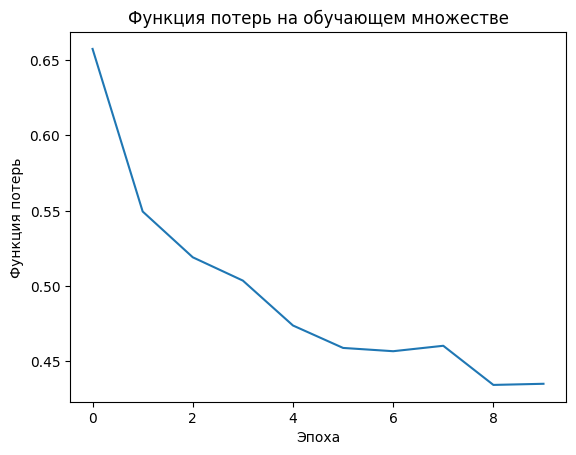

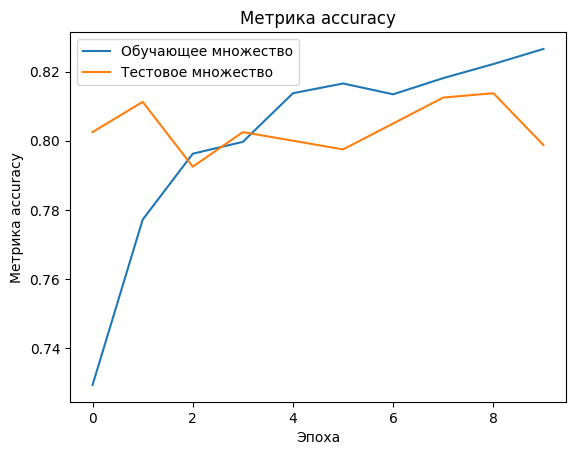

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.models import VGG16_Weights

# Загрузите предобученную модель VGG16
model = torchvision.models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

# Заморозьте все веса модели
for param in model.parameters():
    param.requires_grad = False

# Замените последний слой классификатора на новый слой
num_classes =  4 # количество классов в вашем датасете
model.classifier[-1] = nn.Linear(4096, num_classes)

# Выведите на экран количество настраиваемых параметров модели
print("Количество настраиваемых параметров:", sum(p.numel() for p in model.parameters() if p.requires_grad))

# Определите функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Обучите модель
loss_history = []
accuracy_train_history = []
accuracy_test_history = []
for epoch in range(10):
    start_time = time.time()
    model.train()
    total_loss = 0
    correct = 0
    for batch in train_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
    train_accuracy = correct / len(train_loader.dataset)
    accuracy_train_history.append(train_accuracy)
    train_loss = total_loss / len(train_loader)
    loss_history.append(total_loss / len(train_loader))

    model.eval()
    correct = 0
    with torch.no_grad():
        for batch in test_loader:
            inputs, labels = batch
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
    test_accuracy = correct / len(test_loader.dataset)
    accuracy_test_history.append(test_accuracy)
    print(f'Epoch [{epoch+1}], Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, Time:{time.time() - start_time}')

# Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве
print("Итоговое значение метрики accuracy на обучающем множестве:", accuracy_train_history[-1])
print("Итоговое значение метрики accuracy на тестовом множестве:", accuracy_test_history[-1])

# Постройте графики
plt.plot(loss_history)
plt.title("Функция потерь на обучающем множестве")
plt.xlabel("Эпоха")
plt.ylabel("Функция потерь")
plt.show()

plt.plot(accuracy_train_history, label="Обучающее множество")
plt.plot(accuracy_test_history, label="Тестовое множество")
plt.title("Метрика accuracy")
plt.xlabel("Эпоха")
plt.ylabel("Метрика accuracy")
plt.legend()
plt.show()

<p class="task" id="4"></p>

4\. Повторите решение предыдущей задачи, заморозив все сверточные слои, кроме последнего (слои классификатора не замораживайте). Сравните качество полученного решения и решения из предыдущей задачи, а также время, затраченное на обучения моделей. Перед началом работы создайте модель заново.

- [ ] Проверено на семинаре

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time

# 1. Загружаем модель VGG16
model = models.vgg16(weights='DEFAULT')

# 2. Замораживаем все слои, кроме последнего сверточного слоя и слоев классификатора
for param in model.features[:-1]:  # Замораживаем все кроме последнего сверточного слоя
    for p in param.parameters():
        p.requires_grad = False

# Замораживаем слои классификатора (все будут разморожены)
for param in model.classifier.parameters():
    param.requires_grad = True

# 3. Заменяем последний слой

model.classifier[6] = nn.Linear(in_features=4096, out_features=4)  # Заменяем последний слой

# 4. Выводим количество настраиваемых параметров
num_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Количество настраиваемых параметров: {num_trainable_params}')

# 5. Определяем функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Оптимизируем все параметры

# 6. Загружаем данные
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 7. Обучение модели
num_epochs = 10
train_losses = []
train_accuracies = []
test_accuracies = []


for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accuracy = correct / total
    train_accuracies.append(train_accuracy)

    # Проверка на тестовом наборе
    model.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    test_accuracies.append(test_accuracy)

    epoch_time = time.time() - start_time

    print(f'Epoch [{epoch+1}], Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, Time:{epoch_time}')

# Завершаем отсчет времени
end_time = time.time()
elapsed_time = end_time - start_time

# Итоговые значения метрик
final_train_accuracy = train_accuracies[-1]
final_test_accuracy = test_accuracies[-1]
print(f'Итоговая точность на обучающем множестве: {final_train_accuracy:.4f}')
print(f'Итоговая точность на тестовом множестве: {final_test_accuracy:.4f}')
print(f'Время обучения: {elapsed_time:.2f} секунд')

# 8. Построение графиков
plt.figure(figsize=(12, 5))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', color='orange')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Количество настраиваемых параметров: 119562244
Epoch [1], Loss: 1.0034, Train Accuracy: 0.6419, Test Accuracy: 0.7588, Time:3008.839207172394


<p class="task" id="5"></p>

5\. Повторите решение задачи 3, расширив обучающий набор данных при помощи преобразований из `torchvision`, изменяющих изображение (повороты, изменение интенсивности пикселей, обрезание и т.д.). При оценке модели на тестовой выборке данные преобразования применяться не должны. Решение о том, сколько и каких слоев модели будет обучаться, примите самостоятельно. Перед началом работы создайте модель заново.

- [ ] Проверено на семинаре

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time

# 1. Загружаем модель VGG16
model = models.vgg16(weights='DEFAULT')

# 2. Замораживаем все сверточные слои, кроме последнего
for param in model.features[:-1]:  # Замораживаем все кроме последнего сверточного слоя
    for p in param.parameters():
        p.requires_grad = False

# Все параметры классификатора разморожены
for param in model.classifier.parameters():
    param.requires_grad = True

# 3. Заменяем последний слой
num_classes = len(train_dataset.dataframe['breed'].unique())  # Количество классов
model.classifier[6] = nn.Linear(in_features=4096, out_features=num_classes)  # Заменяем последний слой

# 6. Загружаем данные
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# 7. Определяем функцию потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Оптимизируем все параметры


# 8. Обучение модели
num_epochs = 20
train_losses = []
train_accuracies = []
test_accuracies = []


for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accuracy = correct / total
    train_accuracies.append(train_accuracy)

    # Проверка на тестовом наборе
    model.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}], Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}, Time:{time.time() - start_time}')

# Завершаем отсчет времени
end_time = time.time()
elapsed_time = end_time - start_time

# Итоговые значения метрик
final_train_accuracy = train_accuracies[-1]
final_test_accuracy = test_accuracies[-1]
print(f'Итоговая точность на обучающем множестве: {final_train_accuracy:.4f}')

print(f'Итоговая точность на тестовом множестве: {final_test_accuracy:.4f}')
print(f'Время обучения: {elapsed_time:.2f} секунд')


# 9. Построение графиков
plt.figure(figsize=(12, 5))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', color='blue')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', color='orange')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Обратная связь
- [ ] Хочу получить обратную связь по решению